# Assignment 1

This notebook builds a linear model that predicts weekly COVID-19 given a date, age bracket, and race. 

For more information here is a link to the competition: [https://www.kaggle.com/competitions/cap-4611-2021-fall-assignment-1](https://www.kaggle.com/competitions/cap-4611-2021-fall-assignment-1).

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb # Data visualization
import matplotlib.pyplot as plt
import scipy as stats


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inputdata/sample_submission.csv
/kaggle/input/inputdata/train.csv
/kaggle/input/inputdata/test.csv


Import Data
# #1 **[1 point] You must load the data from the provided CSV files.**

****

In [2]:
train = pd.read_csv("../input/inputdata/train.csv")
test = pd.read_csv("../input/inputdata/test.csv")
submission = pd.read_csv("../input/inputdata/sample_submission.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
train.head()

,id,Data As Of,Start Date,End Date,Group,Year,Month,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Footnote
0,0,09/22/2021,12/29/2019,2020-01-04,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,0-4 years,0.0,104.0,NaN
1,1,09/22/2021,12/29/2019,2020-01-04,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,5-17 years,0.0,41.0,NaN
2,2,09/22/2021,12/29/2019,2020-01-04,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,18-29 years,0.0,190.0,NaN
3,3,09/22/2021,12/29/2019,2020-01-04,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,30-39 years,0.0,237.0,NaN
4,4,09/22/2021,12/29/2019,2020-01-04,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,40-49 years,0.0,325.0,NaN


# #4 [1 point] You must describe any data transformations or feature engineering that are required and provide an explanation as to "why" each is being done.

First there is a lot of data here that is useless to us and some that is redudant.

Let's remove that data.

In [4]:
#train = train.drop(['id'], axis = 1)
train = train.drop(['Data As Of'], axis = 1)
train = train.drop(['Start Date'], axis = 1)
train = train.drop(['Group'], axis = 1)
train = train.drop(['Year'], axis = 1)
train = train.drop(['Month'], axis = 1)
train = train.drop(['Week-Ending Date'], axis = 1)
train = train.drop(['HHS Region'], axis = 1)
train = train.drop(['Total Deaths'], axis = 1)
train = train.drop(['Footnote'], axis = 1)

train.head()

,id,End Date,MMWR Week,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths
0,0,2020-01-04,1.0,Hispanic,0-4 years,0.0
1,1,2020-01-04,1.0,Hispanic,5-17 years,0.0
2,2,2020-01-04,1.0,Hispanic,18-29 years,0.0
3,3,2020-01-04,1.0,Hispanic,30-39 years,0.0
4,4,2020-01-04,1.0,Hispanic,40-49 years,0.0


In [5]:
#test = test.drop(['id'], axis = 1)
test = test.drop(['Data As Of'], axis = 1)
test = test.drop(['Start Date'], axis = 1)
test = test.drop(['Group'], axis = 1)
test = test.drop(['Year'], axis = 1)
test = test.drop(['Month'], axis = 1)
test = test.drop(['Week-Ending Date'], axis = 1)
test = test.drop(['HHS Region'], axis = 1)
test = test.drop(['Total Deaths'], axis = 1)


test.head()

,id,End Date,MMWR Week,Race and Hispanic Origin Group,Age Group
0,5328,2021-06-05,22.0,Hispanic,0-4 years
1,5329,2021-06-05,22.0,Hispanic,5-17 years
2,5330,2021-06-05,22.0,Hispanic,18-29 years
3,5331,2021-06-05,22.0,Hispanic,30-39 years
4,5332,2021-06-05,22.0,Hispanic,40-49 years


Now looking at our data we can see we have categorical data. We need to convert this data to be better processed by our models.

We are going to start with the Age Group, we are going to replace each string with an integer.

The categories are...

NULL -> -1

0-4 -> 0

5-17 -> 1

18-29 -> 2

30-39 -> 3

40-49 -> 4

50-64 -> 5

65-74 -> 6

75--84 -> 7

85 years and over -> 8

In [6]:
def AgeGroupToInt(x):
    if x == '0-4 years': return 0
    elif x == '5-17 years': return 1
    elif x == '18-29 years': return 2
    elif x == '30-39 years': return 3
    elif x == '40-49 years': return 4
    elif x == '50-64 years': return 5
    elif x == '65-74 years': return 6
    elif x == '75-84 years': return 7
    elif x == '85 years and over': return 8
    else: return -1

train['Age Group'] = train['Age Group'].apply(AgeGroupToInt)
test['Age Group'] = test['Age Group'].apply(AgeGroupToInt)
train.head()

,id,End Date,MMWR Week,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths
0,0,2020-01-04,1.0,Hispanic,0,0.0
1,1,2020-01-04,1.0,Hispanic,1,0.0
2,2,2020-01-04,1.0,Hispanic,2,0.0
3,3,2020-01-04,1.0,Hispanic,3,0.0
4,4,2020-01-04,1.0,Hispanic,4,0.0


We also need to do this for Race and Hispanic Origin Group

They will be as follows
Unknown                                           -> 0
Hispanic                                          -> 1
Non-Hispanic American Indian or Alaska Native     -> 2
Non-Hispanic Asian                                -> 3
Non-Hispanic Black                                -> 4
Non-Hispanic More than one race                   -> 5
Non-Hispanic Native Hawaiian or Other Pacific Islander -> 6
Non-Hispanic White                                 -> 7



In [7]:

def RaceGroupToInt(x):
    if x == 'Hispanic': return 1
    elif x == 'Non-Hispanic American Indian or Alaska Native': return 2
    elif x == 'Non-Hispanic Asian': return 3
    elif x == 'Non-Hispanic Black': return 4
    elif x == 'Non-Hispanic More than one race': return 5
    elif x == 'Non-Hispanic Native Hawaiian or Other Pacific Islander': return 6
    elif x == 'Non-Hispanic White': return 7
    else: return 0
    
train['Race and Hispanic Origin Group'] = train['Race and Hispanic Origin Group'].apply(RaceGroupToInt)
test['Race and Hispanic Origin Group'] = test['Race and Hispanic Origin Group'].apply(RaceGroupToInt)
train.head()

,id,End Date,MMWR Week,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths
0,0,2020-01-04,1.0,1,0,0.0
1,1,2020-01-04,1.0,1,1,0.0
2,2,2020-01-04,1.0,1,2,0.0
3,3,2020-01-04,1.0,1,3,0.0
4,4,2020-01-04,1.0,1,4,0.0


Now we need to convert the dates into something the machine can recognize.

First we are going to convert pandas datetime class, then we are going to convert that into an integer.

The nice thing about converting to integer is we can manipulate the data very easily here.




-------------------------------------------------------------------------------------------------------------------------------------

For example: If we look at the trend in the United states August 2020-February 2020 mimics the behavior of April 2021-Octoboer 2021. 

While I didn't do this because I ran out of time, manipulating the date integer to have these time periods equal each other may give us better results.

In [8]:
def to_integer(dt_time):
    if(dt_time.year == 2019): return 30*(dt_time.month - 1) + (dt_time.day - 1)
    elif (dt_time.year == 2020): return 30*(dt_time.month - 1) + (dt_time.day - 1) + 365
    elif (dt_time.year == 2021): return 30*(dt_time.month - 1) + (dt_time.day - 1) + 731

print('Old type: {}'.format(type(train['End Date'][0])))

train['End Date'] = pd.to_datetime(train['End Date'])
train['End Date'] = train['End Date'].apply(to_integer)


test['End Date'] = pd.to_datetime(test['End Date'])
test['End Date'] = test['End Date'].apply(to_integer)

print('New type: {}'.format(type(train['End Date'][0])))
train.head()



Old type: <class 'str'>
New type: <class 'numpy.int64'>


,id,End Date,MMWR Week,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths
0,0,368,1.0,1,0,0.0
1,1,368,1.0,1,1,0.0
2,2,368,1.0,1,2,0.0
3,3,368,1.0,1,3,0.0
4,4,368,1.0,1,4,0.0


Let's now see what all of our data types are

In [9]:
print('End date type: {}'.format(type(train['End Date'][0])))
print('MMWR Week type: {}'.format(type(train['MMWR Week'][0])))
print('Race and Hispanic Origin Group: {}'.format(type(train['Race and Hispanic Origin Group'][0])))
print('Age Group: {}'.format(type(train['Age Group'][0])))
print('COVID-19 Deaths: {}'.format(type(train['COVID-19 Deaths'][0])))

End date type: <class 'numpy.int64'>
MMWR Week type: <class 'numpy.float64'>
Race and Hispanic Origin Group: <class 'numpy.int64'>
Age Group: <class 'numpy.int64'>
COVID-19 Deaths: <class 'numpy.float64'>


# #3 [1 point] You must check for outliers within the training data and, if required, describe and implement an approach to handle those outliers.


**Outliers**

First let's see the data we are dealing with

In [10]:
train.describe()

,id,End Date,MMWR Week,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths
count,72864.000000,72864.000000,58608.000000,72864.000000,72864.000000,57938.000000
mean,43848.282609,625.630435,22.459459,3.500000,4.000000,53.730626
std,25730.268533,149.137430,15.166940,2.291304,2.582007,682.752171
min,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000
25%,21671.750000,498.250000,10.000000,1.750000,2.000000,0.000000
50%,43343.500000,626.500000,19.000000,3.500000,4.000000,0.000000
75%,66167.250000,754.750000,35.000000,5.250000,6.000000,0.000000
max,89423.000000,881.000000,53.000000,7.000000,8.000000,94129.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


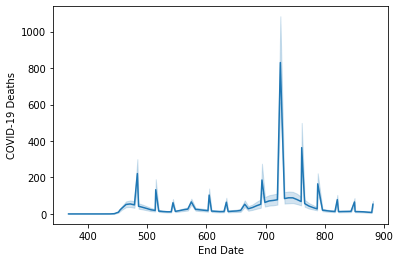

In [11]:
sb.lineplot(train['End Date'], train['COVID-19 Deaths'])
plt.show()


Removing outliers makes our scores worse. So we just made our outlier function remove extreme extreme (4 standard deviations out)

In [12]:
#Here is a outlier detection function, which finds the indexes of outliers given a numerical variable.
def Zscore_outlier(df):
    retval = []
    mean = np.mean(df)
    std = np.std(df)
    index = 0
    
    for i in df: 
        z = (i - mean) / std
        if np.abs(z) > 4: 
            retval.append(index)

        index = index + 1
            
            
    return retval

        
Outliers = np.unique(Zscore_outlier(train['COVID-19 Deaths']))

        

#Now we have to drop all of the outliers from the data.

print("Before we have {} number of rows".format(len(train)))

train = train.drop(Outliers, axis = 0).reset_index(drop = True)






Before we have 72864 number of rows


We also see that that first few months of data was just the start of COVID, therefore the data is going to be different than the test data when COVID is everywhere, so we can also remove that first couple of months of data.

In [13]:
#This removes the first few months of covid data
train = train[train['End Date'] > 450]

In [14]:
print("Now we have {} number of rows".format(len(train)))

Now we have 61608 number of rows


In [15]:
train.describe()

,id,End Date,MMWR Week,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths
count,61608.000000,61608.000000,49068.000000,61608.000000,61608.000000,46898.000000
mean,44591.316355,664.864693,25.546283,3.493962,3.992241,39.843490
std,25744.502538,126.470246,14.601410,2.288491,2.580678,172.201104
min,864.000000,452.000000,1.000000,0.000000,0.000000,0.000000
25%,22349.750000,555.000000,14.000000,1.000000,2.000000,0.000000
50%,43799.500000,665.000000,22.500000,3.000000,4.000000,0.000000
75%,67265.250000,773.000000,38.000000,5.000000,6.000000,10.000000
max,89423.000000,881.000000,53.000000,7.000000,8.000000,2782.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


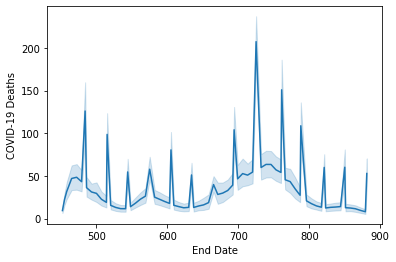

In [16]:
sb.lineplot(train['End Date'], train['COVID-19 Deaths'])
plt.show()


# #2 [1 point] You must check for missing values within the training data and, if required, describe and implement an approach to handle those missing values.


In [17]:
train.isnull().sum().sort_values()

id                                    0
End Date                              0
Race and Hispanic Origin Group        0
Age Group                             0
MMWR Week                         12540
COVID-19 Deaths                   14710
dtype: int64

Since we are looking specifically for covid19 deaths, let's just remove any data with no covid19 deaths in our training set


Additionally, we are going to remove data with missing mmr data because if it doesnt have that information it can be assumed that we aren't dealing with weekly statistics.

In [18]:
train = train.dropna(axis = 0, how = 'any')
train.isnull().sum().sort_values()

id                                0
End Date                          0
MMWR Week                         0
Race and Hispanic Origin Group    0
Age Group                         0
COVID-19 Deaths                   0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


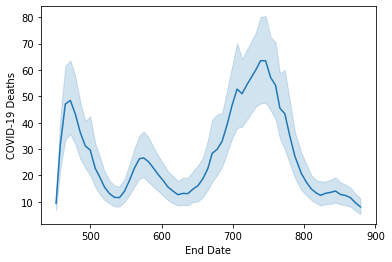

In [19]:
sb.lineplot(train['End Date'], train['COVID-19 Deaths'])
plt.show()

TRAINING

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [21]:
predictors = train.drop(['COVID-19 Deaths'], axis = 1)
target = train["COVID-19 Deaths"]
X, X_val, y, y_val = train_test_split(predictors, target, test_size = 0.22, shuffle = True)

x_test = test.copy()

# #5 [1 point] You must build and train an Ordinary Least Squares model on the training data and evaluate its performance on a set of validation data
You must generate a distribution of validation scores, as well as summary statistics for this distribution (using the pandas describe() method)

In [22]:
from sklearn.linear_model import LinearRegression

model3 = LinearRegression()
model3.fit(X,y)
print('Ordinary Least Squares:',(model3.score(X, y) * 100),'%')

model3VAL = mean_squared_error(y_val, model3.predict(X_val))
print('Validation accuracy', model3VAL)

Ordinary Least Squares: 8.822449101620233 %
Validation accuracy 13762.72613628906


In [23]:
Y_pred = model3.predict(x_test)

model3df = pd.DataFrame({'id': test['id'], 'COVID-19 Deaths': Y_pred})

model3df.describe()

,id,COVID-19 Deaths
count,1152.000000,1152.000000
mean,5903.500000,48.711851
std,332.698061,29.158273
min,5328.000000,-12.906459
25%,5615.750000,26.840679
50%,5903.500000,48.718219
75%,6191.250000,70.557167
max,6479.000000,110.291441


# #6 [1 point] You must build and train a Ridge Regression model on the training data and evaluate its performance on a set of validation data
You must generate a distribution of validation scores, as well as summary statistics for this distribution (using the pandas describe() method)


In [24]:
from sklearn.linear_model import Ridge
model1 = Ridge()
model1.fit(X,y)

print('Ridge Score:',(model1.score(X, y) * 100),'%')

model1VAL = mean_squared_error(y_val, model1.predict(X_val))
print('Validation accuracy', model1VAL)

Ridge Score: 8.822449101450758 %
Validation accuracy 13762.726941150942


In [25]:
Y_pred = model1.predict(x_test)

model1df = pd.DataFrame({'id': test['id'], 'COVID-19 Deaths': Y_pred})

model1df.describe()

,id,COVID-19 Deaths
count,1152.000000,1152.000000
mean,5903.500000,48.711845
std,332.698061,29.158129
min,5328.000000,-12.906159
25%,5615.750000,26.840791
50%,5903.500000,48.718213
75%,6191.250000,70.557044
max,6479.000000,110.291130


# #7 [1 point] You must build and train a Lasso Regression model on the training data and evaluate its performance on a set of validation data
You must generate a distribution of validation scores, as well as summary statistics for this distribution (using the pandas describe() method)

In [26]:
from sklearn.linear_model import Lasso

model2 = Lasso()
model2.fit(X,y)

print('Lasso Score:',(model2.score(X, y) * 100),'%')

model2VAL = mean_squared_error(y_val, model2.predict(X_val))
print('Validation accuracy', model2VAL)

Lasso Score: 8.82011375583227 %
Validation accuracy 13766.000486825395


In [27]:
Y_pred = model2.predict(x_test)

model2df = pd.DataFrame({'id': test['id'], 'COVID-19 Deaths': Y_pred})

model2df.describe()

,id,COVID-19 Deaths
count,1152.000000,1152.000000
mean,5903.500000,48.729193
std,332.698061,28.664013
min,5328.000000,-11.705120
25%,5615.750000,27.157042
50%,5903.500000,48.709800
75%,6191.250000,70.314054
max,6479.000000,109.124720


# #8 [1 point] You must build and train an Elastic Net Regression on the training data and evaluate its performance on a set of validation data
You must generate a distribution of validation scores, as well as summary statistics for this distribution (using the pandas describe() method)


In [28]:
from sklearn.linear_model import ElasticNet

model4 = ElasticNet()
model4.fit(X, y)

print('Elastic Net Score: ',(model4.score(X, y) * 100),'%')

model4VAL = mean_squared_error(y_val, model4.predict(X_val))
print('Validation accuracy', model4VAL)

Elastic Net Score:  8.7823678439931 %
Validation accuracy 13780.560547823516


In [29]:
Y_pred = model4.predict(x_test)

model4df = pd.DataFrame({'id': test['id'], 'COVID-19 Deaths': Y_pred})

model4df.describe()

,id,COVID-19 Deaths
count,1152.000000,1152.000000
mean,5903.500000,48.642026
std,332.698061,26.962590
min,5328.000000,-8.233119
25%,5615.750000,28.249958
50%,5903.500000,48.622561
75%,6191.250000,69.046866
max,6479.000000,105.478242


# #10 [2 points] You must select the best model that you have generated and use that model to predict the target vector for the test data.
You must output this target vector to the notebook as well as save it to your submission.csv file.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Name', ylabel='Validation Score'>

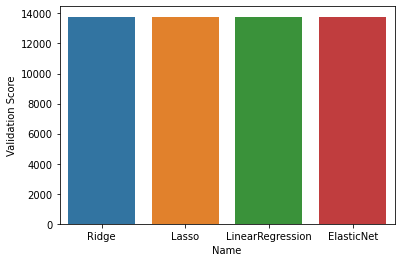

In [30]:
d = {'Name': ['Ridge', 'Lasso', 'LinearRegression', 'ElasticNet'], 'Validation Score': [model1VAL, model2VAL, model3VAL, model4VAL]}

ValidationDF = pd.DataFrame(data = d)

#ValidationDF.head()

sb.barplot(ValidationDF['Name'], ValidationDF['Validation Score'] )

Looking at the data, they are all extremely similar, however Linear Regression has the best score marginally so we are going to go with that.

In [31]:


#Ordinary Least Squares Linear Regression had the best scores therefore we are going to use that as our submission
Y_pred = model3.predict(x_test)

submit = pd.DataFrame({'id': test['id'], 'COVID-19 Deaths': Y_pred})


submit.to_csv('submission.csv', index = False)
print("Submission GOOD")

Submission GOOD


In [32]:
submit.describe()

,id,COVID-19 Deaths
count,1152.000000,1152.000000
mean,5903.500000,48.711851
std,332.698061,29.158273
min,5328.000000,-12.906459
25%,5615.750000,26.840679
50%,5903.500000,48.718219
75%,6191.250000,70.557167
max,6479.000000,110.291441
